# Network Science Book - Chap 4 - Measuring (Ultra) Small World

###### From Network Science Book Section 3.8: The small world phenomenon, also known as six degrees of separation, has long fascinated the general public. It states that if you choose any two individuals anywhere on Earth, you will find a path of at most six acquaintances between them. The fact that individuals who live in the same city are only a few handshakes from each other is by no means surprising. The small world concept states, however, that even individuals who are on the opposite side of the globe can be connected to us via a few acquaintances. <br>Consequently by small in the "small world phenomenon" we mean that the average path length or the <span style='color:red'>diameter</span> depends logarithmically on the system size. Hence, “small” means that ‹d› is proportional to lnN, rather than N or some power of N

###### From Network Science Book Section 4.6: The presence of hubs in scale-free networks raises an interesting question: Do hubs affect the small world property? Image 4.4 suggests that they do: Airlines build hubs precisely to decrease the number of hops between two airports. The calculations support this expectation, finding that distances in a scale-free network are smaller than the distances observed in an equivalent random network.



code developed by Rodrigo Henrique Ramos <br>
rodrigohenrique.ramos@gmail.com

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Creating Networks

In [2]:
random = nx.erdos_renyi_graph(10000,0.0004)
random.name='random'

scaleFree1=nx.barabasi_albert_graph(10000,1)
scaleFree1.name='scaleFree1'

scaleFree2=nx.barabasi_albert_graph(10000,2)
scaleFree2.name='scaleFree2'

scaleFree3=nx.barabasi_albert_graph(10000,3)
scaleFree3.name='scaleFree3'

scaleFree4=nx.barabasi_albert_graph(10000,4)
scaleFree4.name='scaleFree4'

print(nx.info(random),end='\n\n')
print(nx.info(scaleFree1),end='\n\n')
print(nx.info(scaleFree2),end='\n\n')
print(nx.info(scaleFree3),end='\n\n')
print(nx.info(scaleFree4),end='\n\n')

Name: random
Type: Graph
Number of nodes: 10000
Number of edges: 20021
Average degree:   4.0042

Name: scaleFree1
Type: Graph
Number of nodes: 10000
Number of edges: 9999
Average degree:   1.9998

Name: scaleFree2
Type: Graph
Number of nodes: 10000
Number of edges: 19996
Average degree:   3.9992

Name: scaleFree3
Type: Graph
Number of nodes: 10000
Number of edges: 29991
Average degree:   5.9982

Name: scaleFree4
Type: Graph
Number of nodes: 10000
Number of edges: 39984
Average degree:   7.9968



### Plotting the diameter
The diameter is the maximum eccentricity<br>
The eccentricity of a node v is the maximum distance from v to
all other nodes in G.
<br>
As the diameter is the "biggest shortest path", it is susceptible to outliers. So it is interesting to plot the eccentricity of all vertices of the network. 
<br><br>
Many nodes have the same eccentricity. Count how many nodes have the same eccentricity<br>
This plot helps to characterize the small world phenomenon.

In [3]:
def plotExcentricidade(G,title=''):
    #If the network has more than one connected component, it falls into an infinite loop. So I get the Largest Connected Component
    LCC=nx.subgraph(G,max(nx.connected_components(G),key=len))
    
    paths=dict(nx.all_pairs_dijkstra_path_length(LCC))
    excentricidade=list(nx.eccentricity(LCC,sp=paths).values())
    media=np.mean(excentricidade)
    media=round(media)
    title+=' Means '+str(media)+' | '
    Q1=np.percentile(excentricidade,25)
    Q1=round(Q1)
    Q2=np.percentile(excentricidade,5)
    Q2=round(Q1)
    Q3=np.percentile(excentricidade,75)
    Q3=round(Q3)
    title+='Quartiles '+str(Q1)+' - '+str(Q2)+' - '+str(Q3)

    #Ordenada os valores para o plot
    excentricidade=sorted(excentricidade)
    plt.plot(excentricidade,'o')
    plt.xlabel('Nodes')
    plt.ylabel('Eccentricity')
    plt.title(title)
    plt.show()

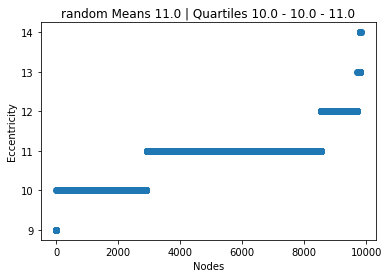

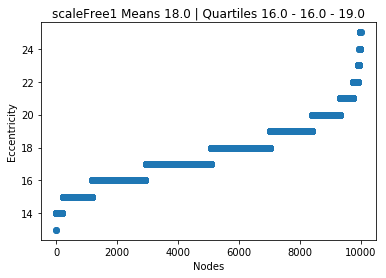

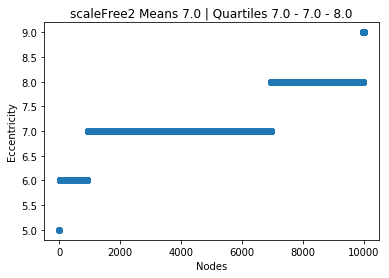

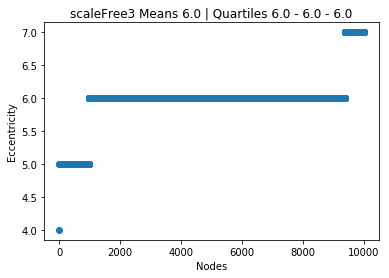

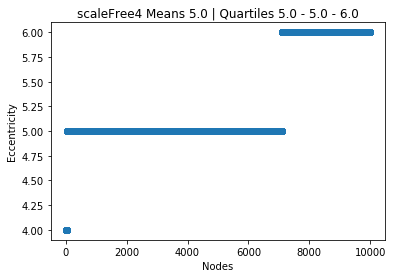

Wall time: 1h 40min 7s


In [4]:
%%time
plotExcentricidade(random,'random')
plotExcentricidade(scaleFree1,'scaleFree1')
plotExcentricidade(scaleFree2,'scaleFree2')
plotExcentricidade(scaleFree3,'scaleFree3')
plotExcentricidade(scaleFree4,'scaleFree4')

In [5]:
def plotExcentricidadeProb(G,title=''):
    LCC=nx.subgraph(G,max(nx.connected_components(G),key=len))
    
    caminhos=dict(nx.all_pairs_dijkstra_path_length(LCC))
    excentricidade=list(nx.eccentricity(LCC,sp=caminhos).values())

    excentricidadeCount={}
    total=len(excentricidade)
    for e in excentricidade:
        if e in excentricidadeCount:
            excentricidadeCount[e]+=1
        else:
            excentricidadeCount[e]=1
            
    #Sort By Key
    excentricidadeCount=dict(sorted(excentricidadeCount.items(),key=lambda x:x[0]))
    for e in excentricidadeCount:
        excentricidadeCount[e]/=total

    excentricidade=sorted(excentricidade)
    plt.plot(list(excentricidadeCount.keys()),list(excentricidadeCount.values()),'o')
    plt.xlabel('Eccentricity')
    plt.ylabel('P(Eccentricity)')
    plt.title(title)
    plt.show()

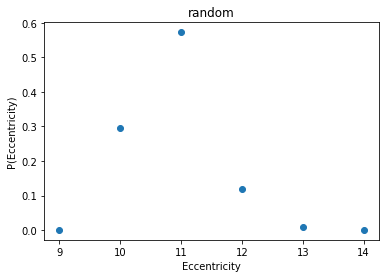

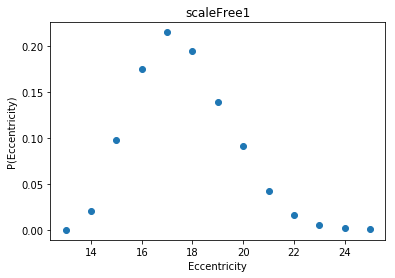

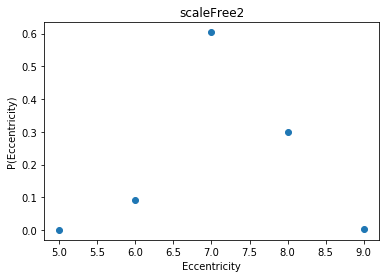

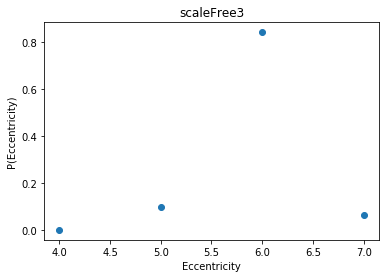

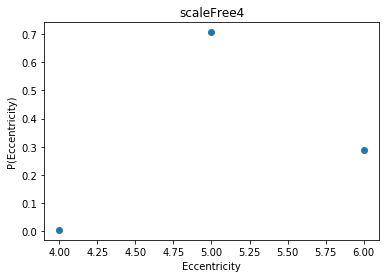

Wall time: 1h 40min 17s


In [6]:
%%time
plotExcentricidadeProb(random,'random')
plotExcentricidadeProb(scaleFree1,'scaleFree1')
plotExcentricidadeProb(scaleFree2,'scaleFree2')
plotExcentricidadeProb(scaleFree3,'scaleFree3')
plotExcentricidadeProb(scaleFree4,'scaleFree4')